Using TensorFlow backend.
C:\Users\ncuser\Anaconda3\envs\Tensorflow-gpu1.9\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ncuser\Anaconda3\envs\Tensorflow-gpu1.9\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ncuser\Anaconda3\envs\Tensorflow-gpu1.9\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 80, 80, 3)    0                                            
__________________________________________________________________________________________________
average_pooling2d_4 (AveragePoo (None, 40, 40, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
average_pooling2d_5 (AveragePoo (None, 20, 20, 3)    0           average_pooling2d_4[0][0]        
__________________________________________________________________________________________________
vgggen5_12_Next0 (Model)        (None, 80, 80, 1)    18966763    average_pooling2d_5[0][0]        
__________________________________________________________________________________________________
vgggen5_12

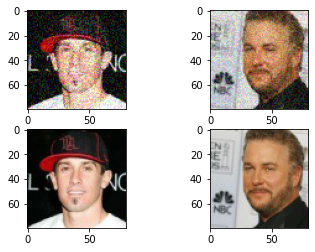

now proc 2999
now proc 5999
now proc 8999
now proc 11999
now proc 14999
now proc 17999
now proc 20999
now proc 23999
now proc 26999
now proc 29999
now proc 32999
test image:


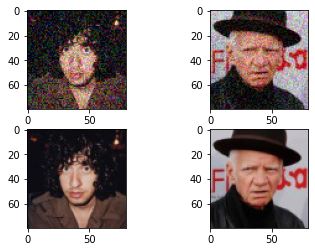

data all loaded!


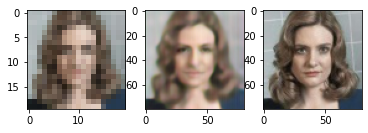

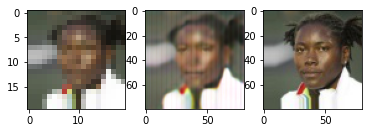

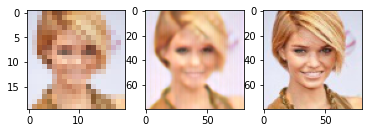

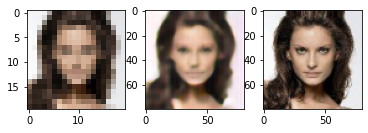

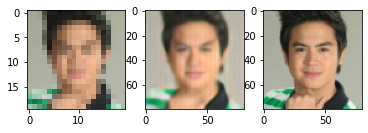

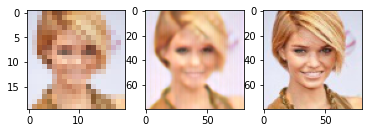

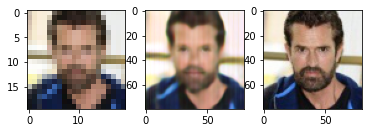

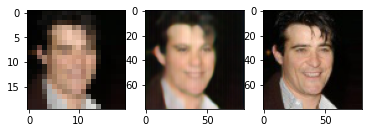

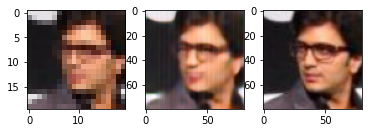

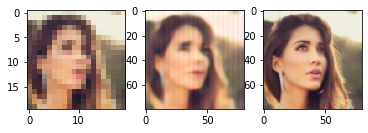

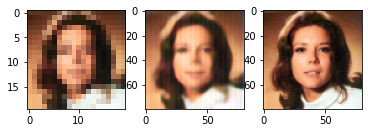

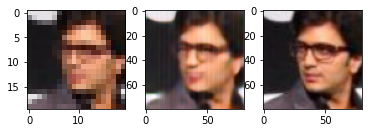

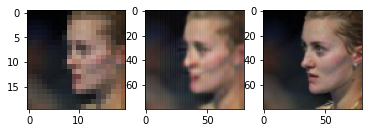

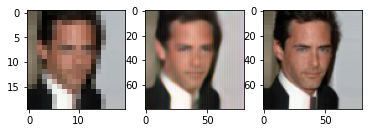

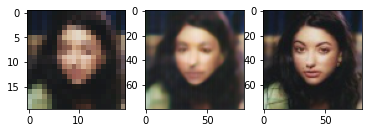

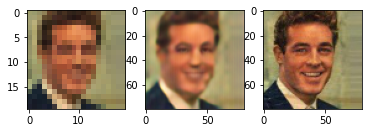

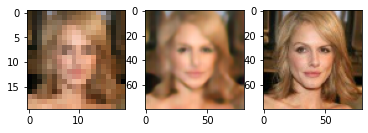

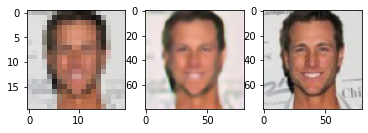

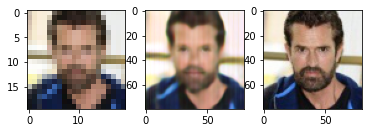

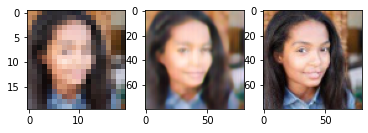

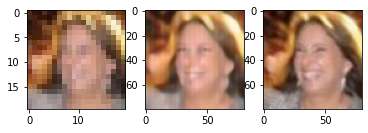

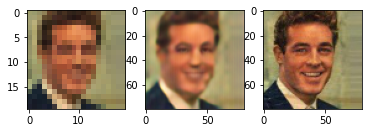

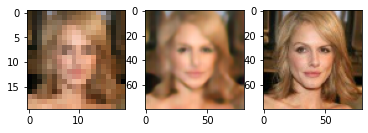

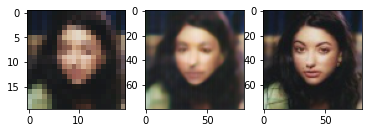

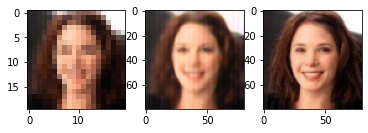

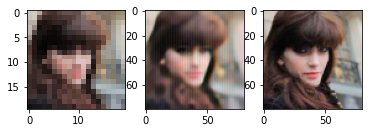

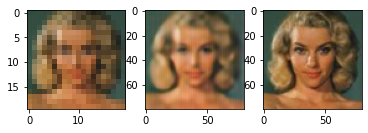

----------------------------------------------------------------------------------------
40*40-->80*80


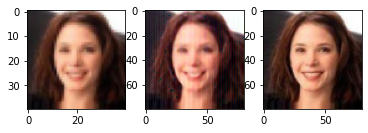

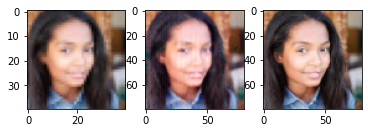

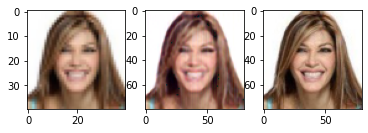

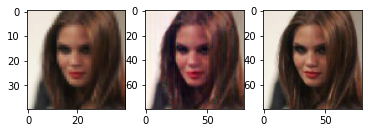

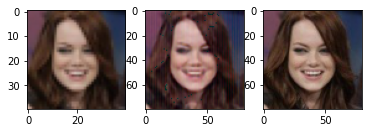

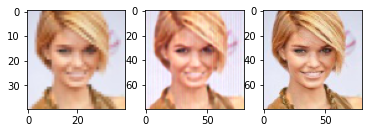

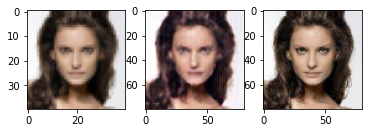

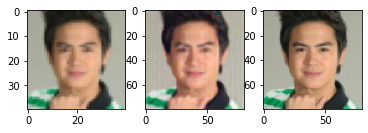

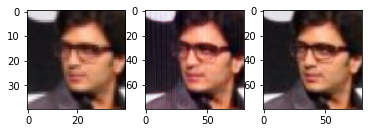

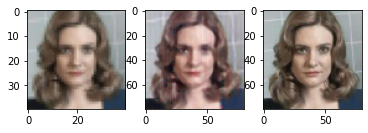

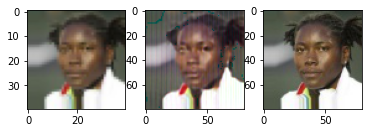

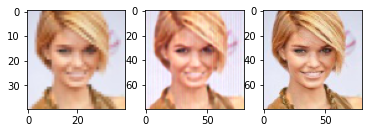

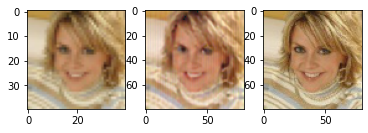

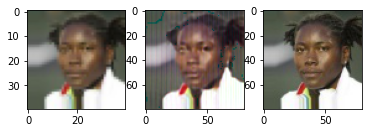

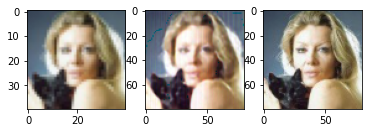

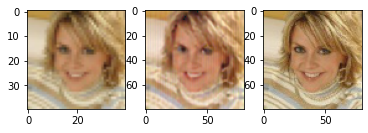

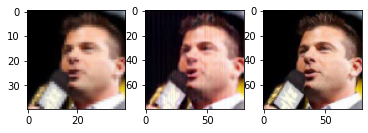

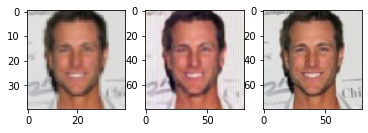

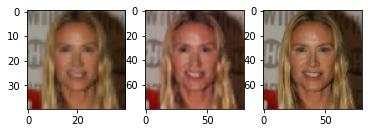

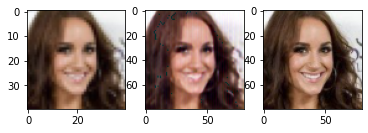

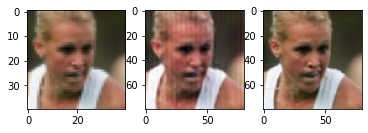

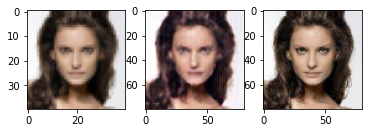

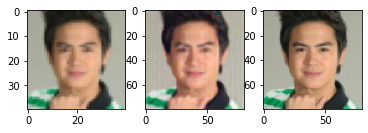

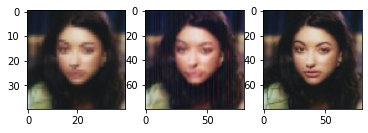

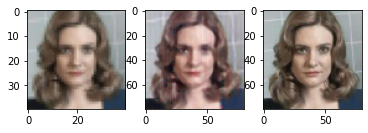

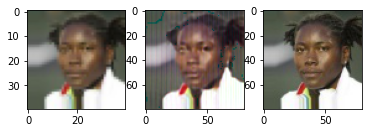

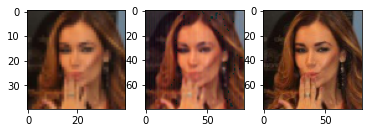

In [1]:
from __future__ import print_function
import keras
#from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Input, Dense, Dropout,Reshape, Flatten
from keras.layers.pooling import MaxPooling2D,AveragePooling2D
from keras.layers import Conv2D, BatchNormalization,UpSampling2D,Merge
from keras.layers import Add,GlobalAveragePooling2D, Lambda, Conv2D,  Dropout, Dense, Flatten, Activation
from keras.layers.merge import concatenate
from keras.preprocessing.image import load_img,img_to_array
from keras.optimizers import Adam, SGD
from keras.layers import LeakyReLU
from keras.layers import concatenate
from keras import backend as K
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.callbacks import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import cv2

FILE_PATH = 'C:\\Users\\ncuser\\facedata\\face_CNN_model_final.h5'
trainpath = 'C:\\Users\\ncuser\\facedata\\new_data_50000\\50000train\\'
testpath = 'C:\\Users\\ncuser\\facedata\\new_data_50000\\50000test\\'

trainpath2 = 'C:\\Users\\ncuser\\facedata\\convdata\\50000train\\'
testpath2 = 'C:\\Users\\ncuser\\facedata\\convdata\\50000test\\'

FILE_PATH = 'h:\\facedata\\face_CNN_model_final.h5'
trainpath = 'h:\\facedata\\new_data_50000\\50000train\\'
testpath = 'h:\\facedata\\new_data_50000\\50000test\\'

trainpath2 = 'h:\\facedata\\convdata\\50000train\\'
testpath2 = 'h:\\facedata\\convdata\\50000test\\'

K.set_floatx('float32')

imgsize = 178
train_samples = 40000
test_samples = 200
batch_size = 12

chanDim = -1

model_input6 = Input(shape=(178,178,3))
input_shape = (178, 178, 3)


model_inputconv = Input(shape=(80,80,3))
input_shapeconv = (80, 80, 3)


model_inputconv2 = Input(shape=(40,40,3))

traindata =[]
traindata2 =[]
traindataok=[]
traincount = 0
testdata = []
testdata2 = []
testdataok=[]
testcount = 0


def sliceuse(x,index):
    return x[:,:,:,index]

def get_lr_metric(optimizer):  # printing the value of the learning rate
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

def splitdata(x,inum,index):
    da = K.int_shape(x)[1]
    #print('data num:',da)
    splitd = (int)(da/inum*2)
    #test = x[:,0:splitd,0:splitd,:]
    #print('test',test)
    
    if index ==0:
        return x[:,0:splitd,0:splitd,:]
    if index ==1:
        return x[:,0:splitd,splitd:,:]
    if index ==2:
        return x[:,splitd:,0:splitd,:]
    return x[:,splitd:,splitd:,:]
    
    #resu = []
    #return  np.array(x[:,0:splitd,0:splitd,:]),  np.array(x[:,0:splitd,splitd:,:]), np.array(x[:,splitd:,0:splitd,:]), np.array(x[:,splitd:,splitd:,:])
#K.int_shape(x)[0]

def point(img,x,y):
    cv2.circle(img,(x,y),1,(0,0,255),10)

def msesum(y_true, y_pred):
    return K.sum(K.abs(y_pred - y_true), axis=-1)*100

def printResu27(modelpr,testcheck,testok):
    img = testcheck[0:60]
    imgok =testok[0:60]
    predict = modelpr.predict(img)
    predict = np.clip(predict, 0., 1.)
    n1 = 0
    n2 = 0
    n3 = 0
    nl = np.random.uniform(low = 21,high = 39,size =[1])
    n1 = (int)(n1)-20
    n2 = np.random.uniform(low = 21,high = 39,size =[1])
    n2 = (int)(n2)
    noise = np.random.uniform(low = 11,high = 19,size =[1])
    noise =(int)((noise-11)/3)
    n1 = (int)(n2)-20+noise
    n3 = np.random.uniform(low = 40,high = 59,size =[1])
    n3 = (int)(n3)
    p1 = img[n1]
    p2 = predict[n1]
    p21 =imgok[n1]
    p5 = img[n2]
    p6 = predict[n2]
    p61 =imgok[n2]
        
    p7= img[n3]
    p8 = predict[n3]
    p81=imgok[n3]
    
    
    p1.shape = [80,80,3]
    p2.shape = [80,80,3]
    p21.shape = [80,80,3]
            
    p5.shape = [80,80,3]
    p6.shape = [80,80,3]
    p61.shape = [80,80,3]
    
    p7.shape = [80,80,3]
    p8.shape = [80,80,3]
    p81.shape = [80,80,3]
    
    p1 = p1.astype('float32')
    p2 = p2.astype('float32')
    p21 = p21.astype('float32')
            
    p5 = p5.astype('float32')
    p6 = p6.astype('float32')
    p61 = p61.astype('float32')
    
    p7 = p7.astype('float32')
    p8 = p8.astype('float32')
    p81 = p81.astype('float32')
    
    plt.subplot(1, 3, 1)
    plt.imshow(p1)
    plt.subplot(1, 3, 2)    
    plt.imshow(p2)
    plt.subplot(1, 3, 3)
    plt.imshow(p21)   
    plt.show()
            
    plt.subplot(1, 3, 1)
    plt.imshow(p5)
    plt.subplot(1, 3, 2)
    plt.imshow(p6)
    plt.subplot(1, 3, 3)
    plt.imshow(p61)
    plt.show()
    
    plt.subplot(1, 3, 1)
    plt.imshow(p7)
    plt.subplot(1, 3, 2)
    plt.imshow(p8)
    plt.subplot(1, 3, 3)
    plt.imshow(p81)
    plt.show()
    return

def printResu28(modelpr,testcheck,testok):
    img = testcheck[0:60]
    imgok =testok[0:60]
    predict = modelpr.predict(img)
    predict = np.clip(predict, 0., 1.)
    n1 = 0
    n2 = 0
    n3 = 0
    nl = np.random.uniform(low = 21,high = 39,size =[1])
    n1 = (int)(n1)-20
    n2 = np.random.uniform(low = 21,high = 39,size =[1])
    n2 = (int)(n2)
    noise = np.random.uniform(low = 11,high = 19,size =[1])
    noise =(int)((noise-11)/3)
    n1 = (int)(n2)-20+noise
    n3 = np.random.uniform(low = 40,high = 59,size =[1])
    n3 = (int)(n3)
    p1 = img[n1]
    p2 = predict[n1]
    p21 =imgok[n1]
    p5 = img[n2]
    p6 = predict[n2]
    p61 =imgok[n2]
        
    p7= img[n3]
    p8 = predict[n3]
    p81=imgok[n3]
    
    
    p1.shape = [80,80,3]
    p2.shape = [40,40,3]
    p21.shape = [80,80,3]
            
    p5.shape = [80,80,3]
    p6.shape = [40,40,3]
    p61.shape = [80,80,3]
    
    p7.shape = [80,80,3]
    p8.shape = [40,40,3]
    p81.shape = [80,80,3]
    
    p1 = p1.astype('float32')
    p2 = p2.astype('float32')
    p21 = p21.astype('float32')
            
    p5 = p5.astype('float32')
    p6 = p6.astype('float32')
    p61 = p61.astype('float32')
    
    p7 = p7.astype('float32')
    p8 = p8.astype('float32')
    p81 = p81.astype('float32')
    
    plt.subplot(1, 3, 1)
    plt.imshow(p1)
    plt.subplot(1, 3, 2)    
    plt.imshow(p2)
    plt.subplot(1, 3, 3)
    plt.imshow(p21)   
    plt.show()
            
    plt.subplot(1, 3, 1)
    plt.imshow(p5)
    plt.subplot(1, 3, 2)
    plt.imshow(p6)
    plt.subplot(1, 3, 3)
    plt.imshow(p61)
    plt.show()
    
    plt.subplot(1, 3, 1)
    plt.imshow(p7)
    plt.subplot(1, 3, 2)
    plt.imshow(p8)
    plt.subplot(1, 3, 3)
    plt.imshow(p81)
    plt.show()
    return


def printResu2(modelpr):
    printResu27(modelpr,testdataok,testdataok)
    return

def average2(inputs):      
    
    x =  inputs
    x = AveragePooling2D((2, 2))(x)
    x = AveragePooling2D((2, 2))(x)
    layer_model = Model(inputs=inputs,outputs=x)
    return layer_model

average2 = average2(model_inputconv)

def average3(inputs):      
    
    x =  inputs
    x = AveragePooling2D((2, 2))(x)    
    layer_model = Model(inputs=inputs,outputs=x)
    return layer_model

average3 = average3(model_inputconv)

def printGen22Resu(modelpr,num,runmode):
    if runmode==0:
        img = testdataok[0:60]   
    else:
        img = testdata[0:60]   
    imgok =testdataok[0:60]
    predict = modelpr.predict(img)    
    predict = np.clip(predict, 0., 1.)
    
    """
    img = np.array(img)
    img = tf.convert_to_tensor(img)
    img = AveragePooling2D((2, 2))(img)
    img = AveragePooling2D((2, 2))(img)
    img = np.array(img)
    """
    if num==40:        
        img = average3.predict(img)
        img = np.array(img)
        img = np.clip(img, 0., 1.)
    if num==20:
        img = average2.predict(img)    
        img = np.array(img)
        img = np.clip(img, 0., 1.)
    n1 = 0
    n2 = 0
    n3 = 0
    nl = np.random.uniform(low = 21,high = 39,size =[1])
    n1 = (int)(n1)-20
    n2 = np.random.uniform(low = 21,high = 39,size =[1])
    n2 = (int)(n2)
    noise = np.random.uniform(low = 11,high = 19,size =[1])
    noise =(int)((noise-11)/3)
    n1 = (int)(n2)-20+noise
    n3 = np.random.uniform(low = 40,high = 59,size =[1])
    n3 = (int)(n3)
    p1 = img[n1]
    p2 = predict[n1]
    p21 =imgok[n1]
    p5 = img[n2]
    p6 = predict[n2]
    p61 =imgok[n2]
        
    p7= img[n3]
    p8 = predict[n3]
    p81=imgok[n3]
    
    
    p1.shape = [num,num,3]
    p2.shape = [80,80,3]
    p21.shape = [80,80,3]
            
    p5.shape = [num,num,3]
    p6.shape = [80,80,3]
    p61.shape = [80,80,3]
    
    p7.shape = [num,num,3]
    p8.shape = [80,80,3]
    p81.shape = [80,80,3]
    
    p1 = p1.astype('float32')
    p2 = p2.astype('float32')
    p21 = p21.astype('float32')
            
    p5 = p5.astype('float32')
    p6 = p6.astype('float32')
    p61 = p61.astype('float32')
    
    p7 = p7.astype('float32')
    p8 = p8.astype('float32')
    p81 = p81.astype('float32')
    
    plt.subplot(1, 3, 1)
    plt.imshow(p1)
    plt.subplot(1, 3, 2)    
    plt.imshow(p2)
    plt.subplot(1, 3, 3)
    plt.imshow(p21)   
    plt.show()
            
    plt.subplot(1, 3, 1)
    plt.imshow(p5)
    plt.subplot(1, 3, 2)
    plt.imshow(p6)
    plt.subplot(1, 3, 3)
    plt.imshow(p61)
    plt.show()
    
    plt.subplot(1, 3, 1)
    plt.imshow(p7)
    plt.subplot(1, 3, 2)
    plt.imshow(p8)
    plt.subplot(1, 3, 3)
    plt.imshow(p81)
    plt.show()
    return

def printGen23Resu(modelpr):
    img = testdata[0:60]   
    imgok =testdataok[0:60]
    predict = modelpr.predict(img)    
    predict = np.clip(predict, 0., 1.)
    img = average3.predict(img)    
    img = np.clip(img, 0., 1.)
    """
    img = np.array(img)
    img = tf.convert_to_tensor(img)
    img = AveragePooling2D((2, 2))(img)
    img = AveragePooling2D((2, 2))(img)
    img = np.array(img)
    """
    n1 = 0
    n2 = 0
    n3 = 0
    nl = np.random.uniform(low = 21,high = 39,size =[1])
    n1 = (int)(n1)-20
    n2 = np.random.uniform(low = 21,high = 39,size =[1])
    n2 = (int)(n2)
    noise = np.random.uniform(low = 11,high = 19,size =[1])
    noise =(int)((noise-11)/3)
    n1 = (int)(n2)-20+noise
    n3 = np.random.uniform(low = 40,high = 59,size =[1])
    n3 = (int)(n3)
    p1 = img[n1]
    p2 = predict[n1]
    p21 =imgok[n1]
    p5 = img[n2]
    p6 = predict[n2]
    p61 =imgok[n2]
        
    p7= img[n3]
    p8 = predict[n3]
    p81=imgok[n3]
    
    
    p1.shape = [40,40,3]
    p2.shape = [80,80,3]
    p21.shape = [80,80,3]
            
    p5.shape = [40,40,3]
    p6.shape = [80,80,3]
    p61.shape = [80,80,3]
    
    p7.shape = [40,40,3]
    p8.shape = [80,80,3]
    p81.shape = [80,80,3]
    
    p1 = p1.astype('float32')
    p2 = p2.astype('float32')
    p21 = p21.astype('float32')
            
    p5 = p5.astype('float32')
    p6 = p6.astype('float32')
    p61 = p61.astype('float32')
    
    p7 = p7.astype('float32')
    p8 = p8.astype('float32')
    p81 = p81.astype('float32')
    
    plt.subplot(1, 3, 1)
    plt.imshow(p1)
    plt.subplot(1, 3, 2)    
    plt.imshow(p2)
    plt.subplot(1, 3, 3)
    plt.imshow(p21)   
    plt.show()
            
    plt.subplot(1, 3, 1)
    plt.imshow(p5)
    plt.subplot(1, 3, 2)
    plt.imshow(p6)
    plt.subplot(1, 3, 3)
    plt.imshow(p61)
    plt.show()
    
    plt.subplot(1, 3, 1)
    plt.imshow(p7)
    plt.subplot(1, 3, 2)
    plt.imshow(p8)
    plt.subplot(1, 3, 3)
    plt.imshow(p81)
    plt.show()
    return


def data_label(path):
    f = open(path+"lable-40.txt","r")
    j = 0
    i = -1
    datalist = []
    labellist = []
    while True:
        for line in f.readlines():
            i+=1
            j +=1
            a = line.replace("\n","")
            b = a.split(",")
            lable = b[1:]
            imgname = path+b[0]
            images = load_img(imgname)
            images = img_to_array(images).astype('float32')
            image = np.expand_dims(images,axis= 0)
            lables = np.array(lable)
            
            lable= lables.reshape(1,10)
            yield(image,lable)

            
def img_conv(path):
    f = open(path+"lable-40.txt","r")
    j = 0
    i = -1
    datalist = []
    labellist = []
    
    for line in f.readlines():        
        
        i+=1
        j +=1
        a = line.replace("\n","")
        b = a.split(",")
        lable = b[1:]
        imgname = path+b[0]
            #images = load_img(imgname)
            #images = img_to_array(images).astype('float32')
            #image = np.expand_dims(images,axis= 0)
        imgs = cv2.imread(imgname)
        image2 = cv2.resize(imgs,(80,80))
        cv2.imwrite(imgname,image2)
        if (j%100==99):
            print('now proc',j)

def img_conv2(path,inum):
    f = open(path+"lable-40.txt","r")
    j = 0
    i = -1
    datalist = []
    labellist = []
    
    for line in f.readlines():        
        
        i+=1
        j +=1
        a = line.replace("\n","")
        b = a.split(",")
        lable = b[1:]
        imgname = path+b[0]
            #images = load_img(imgname)
            #images = img_to_array(images).astype('float32')
            #image = np.expand_dims(images,axis= 0)
        imgs = cv2.imread(imgname)
        image2 = cv2.resize(imgs,(inum,inum))
        cv2.imwrite(imgname,image2)
        if (j%100==99):
            print('now proc',j)

def procData():
    print('begin proc image')
    img_conv(trainpath2)
    print('train images complete')
    img_conv(testpath2)
    print('test images complete')


def data_labelnoisy(path):
    f = open(path+"lable-40.txt","r")
    j = 0
    i = -1
    n1 = 0
    n2 = 0
    dataresu = []
    datalist = []
    bPrintpic = False
    for line in f.readlines():        
        i+=1
        j +=1
        a = line.replace("\n","")
        b = a.split(",")
        lable = b[1:]
        imgname = path+b[0]
        
        #images = load_img(imgname)
        #images = img_to_array(images).astype('float32')
        #image = np.expand_dims(images,axis= 0)
        
        images = load_img(imgname)
        images = img_to_array(images).astype('float32')
        image = np.expand_dims(images,axis= 0)
           
        noise_factor = 2
        #x_train_noisy = image + (noise_factor * np.random.normal(loc=0.0, scale=2.0, size=image.shape))

        w = np.random.uniform(low = -50,high = 50,size =image.shape)
        wmul = np.random.uniform(low = 0.7,high = 1.2,size =[1])
        #print('wmul',wmul)
        x_train_noisy = image + w*wmul
        image = image/255
        x_train_noisy = x_train_noisy/255
        x_train_noisy = np.clip(x_train_noisy, 0., 1.)            
        
        image = image.astype('float32')
        x_train_noisy = x_train_noisy.astype('float32')
        #,dtype=float32
        #image = tf.convert_to_tensor(image)
        #x_train_noisy = tf.convert_to_tensor(x_train_noisy)
        image.shape = [80,80,3]
        x_train_noisy.shape = [80,80,3]
        datalist.append(image)
        dataresu.append(x_train_noisy)
        
        if (j%3000==2999):
            print('now proc',j)
            if (j>30000):                
                return dataresu,datalist,j
        if (j==1000):
            bPrintpic = True
            print('w',w)
            print('source:')
            print(image)
            print('conv source:')
            print(x_train_noisy)            
            nl = np.random.uniform(low = 100,high = 500,size =[1])
            nl = np.random.uniform(low = 500,high = 999,size =[1])
            n1 = (int)(n1)-500
            n2 = np.random.uniform(low = 500,high = 999,size =[1])
            n2 = (int)(n2)
            n1 = (int)(n2)-500
            p1 = dataresu[n1]
            p2 = dataresu[n2]
            p5 = datalist[n1]
            p6 = datalist[n2]
            
            """
            p1 = dataresu[1]
            p2 = dataresu[2]
            p5 = datalist[1]
            p6 = datalist[2]
            """
            
            p1.shape = [80,80,3]
            p2.shape = [80,80,3]
            
            p5.shape = [80,80,3]
            p6.shape = [80,80,3]
            p1 = p1.astype('float32')
            p2 = p2.astype('float32')
            
            p5 = p5.astype('float32')
            p6 = p6.astype('float32')
            #p1 = p1/255
            #p2 = p2/255
            
            #p5 = p5/255
            #p6 = p6/255
            #p1 = Reshape((120,120,3))(p1)
            #p2 = Reshape((120,120,3))(p2)
            plt.subplot(2, 2, 1)
            plt.imshow(p1)
            plt.subplot(2, 2, 2)
            plt.imshow(p2)
            
            plt.subplot(2, 2, 3)
            plt.imshow(p5)
            plt.subplot(2, 2, 4)
            plt.imshow(p6)
            #image.shape = [120, 120,3]
            #plt.subplot(1, 2, 2)
            #plt.imshow(image)
            plt.show()
            
            """
            image = cv2.resize(x_train_noisy,(120,120))
            image2 = cv2.resize(image,(120,120))
            cv2.imshow('img',image)
            cv2.imshow('img2',image2)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
           
            """
    #ataresu = tf.convert_to_tensor(dataresu)
    #datalist = tf.convert_to_tensor(datalist)
    #traindata = np.array(traindata)
    #traindataok= np.array(traindataok)
    #testdata = np.array(testdata)
    #testdataok = np.array(testdataok)
    #dataresu = np.array(dataresu)
    #datalist = np.array(datalist)
    resui =(int)(i/2)
    if (bPrintpic==False):
        print("test image:")
        nl = np.random.uniform(low = resui+1,high = resui*2,size =[1])
        n1 = (int)(n1)-resui
        n2 = np.random.uniform(low = resui+1,high = resui*2,size =[1])
        n2 = (int)(n2)
        n1 = (int)(n2)-resui
        p1 = dataresu[n1]
        p2 = dataresu[n2]
        p5 = datalist[n1]
        p6 = datalist[n2]
            
            
        p1.shape = [80,80,3]
        p2.shape = [80,80,3]
            
        p5.shape = [80,80,3]
        p6.shape = [80,80,3]
        p1 = p1.astype('float32')
        p2 = p2.astype('float32')
            
        p5 = p5.astype('float32')
        p6 = p6.astype('float32')
        
        plt.subplot(2, 2, 1)
        plt.imshow(p1)
        plt.subplot(2, 2, 2)
        plt.imshow(p2)
            
        plt.subplot(2, 2, 3)
        plt.imshow(p5)
        plt.subplot(2, 2, 4)
        plt.imshow(p6)
        plt.show()
            
    return dataresu,datalist,j


def data_chnagenoisy(datalist,icount):
   
    j = 0
    i = -1
    dataresu = []
    
    n1 =0
    n2 =0
    for i in range(icount):        
        image = datalist[i]
       
        tm =np.random.uniform(low = 5,high = 12,size =[1])
        tm= (int)(tm)
        tm2 =np.random.uniform(low = -5,high = 5,size =[1])
        tm2= (int)(tm)
        if tm>9:
            w = np.random.uniform(low = -50+tm2,high = 50+tm2,size =image.shape)
        else:
            if tm>7:
                w = np.random.uniform(low = -60+tm2,high = 60+tm2,size =image.shape)
            else:
                w = np.random.uniform(low = -30+tm2,high = 70+tm2,size =image.shape)
        
        if tm>9:
            w = w*1.2
        else:
            if tm>7:
                w=w*0.9
            else:
                w=w*0.7
        x_train_noisy = image*255 + w
        x_train_noisy = x_train_noisy/255
        x_train_noisy = np.clip(x_train_noisy, 0., 1.)            
        
        dataresu.append(x_train_noisy)
        
        if (j%1000==999):
            print('now proc',j)            
                
        if (i==100):
            #print('w',w)
            #print('source:')
            #print(image)
            #print('conv source:')
            #print(x_train_noisy)            
            nl = np.random.uniform(low = 51,high = 100,size =[1])
            
            n2 = np.random.uniform(low = 51,high = 100,size =[1])
            n2 = (int)(n2)
            n1 = n2-50
            p1 = dataresu[n1]
            p2 = dataresu[n2]
            p5 = datalist[n1]
            p6 = datalist[n2]
            p1.shape = [80,80,3]
            p2.shape = [80,80,3]
            
            p5.shape = [80,80,3]
            p6.shape = [80,80,3]
            p1 = p1.astype('float32')
            p2 = p2.astype('float32')
            
            p5 = p5.astype('float32')
            p6 = p6.astype('float32')
            #p1 = p1/255
            #p2 = p2/255
            
            #p5 = p5/255
            #p6 = p6/255
            #p1 = Reshape((120,120,3))(p1)
            #p2 = Reshape((120,120,3))(p2)
            plt.subplot(2, 2, 1)
            plt.imshow(p1)
            plt.subplot(2, 2, 2)
            plt.imshow(p2)
            
            plt.subplot(2, 2, 3)
            plt.imshow(p5)
            plt.subplot(2, 2, 4)
            plt.imshow(p6)
            #image.shape = [120, 120,3]
            #plt.subplot(1, 2, 2)
            #plt.imshow(image)
            plt.show()           
    return dataresu


def data_chnagenoisy2(datalist,icount,nproc):
   
    j = 0
    i = -1
    dataresu = []
    
    n1 =0
    n2 =0
    for i in range(icount):        
        image = datalist[i]        
        tm =np.random.uniform(low = 5,high = 12,size =[1])
        tm= (int)(tm)
        tm2 =np.random.uniform(low = -5,high = 5,size =[1])
        tm2= (int)(tm)
        tm5 =np.random.uniform(low = -2,high = 7,size =[1])
        tm5= (int)(tm)
        tm3 =np.random.uniform(low = -3,high = tm5+1,size =[1])
        tm3= (int)(tm)
        if tm>9:
            w = np.random.uniform(low = -50+tm2+tm3,high = 50+tm2+tm3,size =image.shape)
        else:
            if tm>7:
                w = np.random.uniform(low = -60+tm2+tm3,high = 60+tm2+tm3,size =image.shape)
            else:
                w = np.random.uniform(low = -30+tm2+tm3,high = 70+tm2+tm3,size =image.shape)
        if tm>9:
            w = w*1.2
        else:
            if tm>7:
                w=w*0.9
            else:
                w=w*0.7
        tm2 =np.random.uniform(low = 6,high = 66,size =[1])
        tm2= (int)(tm2)
        if tm2>12:
            if nproc==0:
                x_train_noisy = image*255 + w* ((tm2-12)/50+0.1)
            if nproc==1:
                x_train_noisy = image*255 + w* ((tm2-12)/80+0.1)
            if nproc==2:
                x_train_noisy = image*255 + w* ((tm2-12)/120+0.1)
            x_train_noisy = x_train_noisy/255
        else:
            x_train_noisy = image
        x_train_noisy = np.clip(x_train_noisy, 0., 1.)            
        
        dataresu.append(x_train_noisy)
        
        if (j%1000==999):
            print('now proc',j)            
                
        if (i==100):
            #print('w',w)
            #print('source:')
            #print(image)
            #print('conv source:')
            #print(x_train_noisy)            
            nl = np.random.uniform(low = 51,high = 100,size =[1])
            
            n2 = np.random.uniform(low = 51,high = 100,size =[1])
            n2 = (int)(n2)
            n1 = n2-50
            p1 = dataresu[n1]
            p2 = dataresu[n2]
            p5 = datalist[n1]
            p6 = datalist[n2]
            p1.shape = [80,80,3]
            p2.shape = [80,80,3]
            
            p5.shape = [80,80,3]
            p6.shape = [80,80,3]
            p1 = p1.astype('float32')
            p2 = p2.astype('float32')
            
            p5 = p5.astype('float32')
            p6 = p6.astype('float32')
            #p1 = p1/255
            #p2 = p2/255
            
            #p5 = p5/255
            #p6 = p6/255
            #p1 = Reshape((120,120,3))(p1)
            #p2 = Reshape((120,120,3))(p2)
            plt.subplot(2, 2, 1)
            plt.imshow(p1)
            plt.subplot(2, 2, 2)
            plt.imshow(p2)
            
            plt.subplot(2, 2, 3)
            plt.imshow(p5)
            plt.subplot(2, 2, 4)
            plt.imshow(p6)
            #image.shape = [120, 120,3]
            #plt.subplot(1, 2, 2)
            #plt.imshow(image)
            plt.show()           
    return dataresu



def printResu3(modeprev,modelpr,chang,num):
    if  chang:
        img = testdata[0:60]
    else:
        img = testdataok[0:60]
    imgok =testdataok[0:60]
    predictPrev = modeprev.predict(img)
    predictPrev = np.clip(predictPrev, 0., 1.)
    if chang:
        predictPrev = data_chnagenoisy2(predictPrev,60,0)
        predictPrev = np.clip(predictPrev, 0., 1.)
        predictPrev = np.array(predictPrev)
    
    predict = modelpr.predict(predictPrev)
    predict = np.clip(predict, 0., 1.)
    if num==40:        
        img = average3.predict(img)
        img = np.array(img)
        img = np.clip(img, 0., 1.)
    if num==20:
        img = average2.predict(img)    
        img = np.array(img)
        img = np.clip(img, 0., 1.)
    n1 = 0
    n2 = 0
    n3 = 0
    noise = np.random.uniform(low = 11,high = 19,size =[1])
    noise =(int)((noise-11)/3)
    nl = np.random.uniform(low = 21,high = 39,size =[1])
    n1 = (int)(n1)-20
    n2 = np.random.uniform(low = 21,high = 39,size =[1])
    n2 = (int)(n2)   
    n1 = (int)(n2)-20+noise
    n3 = np.random.uniform(low = 40,high = 59,size =[1])
    n3 = (int)(n3)
    p1 = img[n1]
    p11 = predictPrev[n1]
    p2 = predict[n1]
    p21 =imgok[n1]
    
    p5 = img[n2]
    p51 = predictPrev[n2]
    p6 = predict[n2]
    p61 =imgok[n2]
        
    p7= img[n3]
    p71 = predictPrev[n3]
    p8 = predict[n3]
    p81=imgok[n3]
    
    
    p1.shape = [num,num,3]
    p11.shape = [80,80,3]
    p2.shape = [80,80,3]
    p21.shape = [80,80,3]
            
    p5.shape = [num,num,3]
    p51.shape = [80,80,3]
    p6.shape = [80,80,3]
    p61.shape = [80,80,3]
    
    p7.shape = [num,num,3]
    p71.shape = [80,80,3]
    p8.shape = [80,80,3]
    p81.shape = [80,80,3]
    
    p1 = p1.astype('float32')
    p11 = p11.astype('float32')
    p2 = p2.astype('float32')
    p21 = p21.astype('float32')
            
    p5 = p5.astype('float32')
    p51 = p51.astype('float32')
    p6 = p6.astype('float32')
    p61 = p61.astype('float32')
    
    p7 = p7.astype('float32')
    p71 = p71.astype('float32')
    p8 = p8.astype('float32')
    p81 = p81.astype('float32')
    
    plt.subplot(2, 2, 1)
    plt.imshow(p1)
    plt.subplot(2, 2, 2)
    plt.imshow(p11)
    plt.subplot(2, 2, 3)    
    plt.imshow(p2)
    plt.subplot(2, 2, 4)
    plt.imshow(p21)   
    plt.show()
            
    plt.subplot(2, 2, 1)
    plt.imshow(p5)
    plt.subplot(2, 2, 2)
    plt.imshow(p51)
    plt.subplot(2, 2, 3)
    plt.imshow(p6)
    plt.subplot(2, 2, 4)
    plt.imshow(p61)
    plt.show()
    
    plt.subplot(2, 2, 1)
    plt.imshow(p7)
    plt.subplot(2, 2, 2)
    plt.imshow(p71)
    plt.subplot(2, 2, 3)
    plt.imshow(p8)
    plt.subplot(2, 2, 4)
    plt.imshow(p81)
    plt.show()
    return



def vgggen5_12_Next(inputs,num):
    weight_decay = 0.0005    
       
   
    x6 = Lambda(sliceuse,output_shape=(20,20,1),arguments={'index':num})(inputs)
    x6 = Reshape((20,20,1))(x6)
    
    x=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x6)
    x= BatchNormalization(axis=chanDim)(x)
    x= LeakyReLU(alpha=0.05)(x)       
  
    
    x=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x)
    x= BatchNormalization(axis=chanDim)(x)
    x1= LeakyReLU(alpha=0.05)(x) 
    
    x5=Conv2D(filters=64,kernel_size=(3,3),strides=2,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x1)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)
    
    x5=Conv2D(filters=64,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x5)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)
    
    x5=Conv2D(filters=64,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x5)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)
    
           
    x5= UpSampling2D()(x5)
        
    
    x5=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x5)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)
    
    x5=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x5)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)
    

    x5=Conv2D(filters=1,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x5)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)     
    #20*20
  
    x7= UpSampling2D()(x5)  #40*40 
    
    x7=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x7)
    x7= BatchNormalization(axis=chanDim)(x7)
    x7= LeakyReLU(alpha=0.05)(x7)
    
    x7=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x7)
    x7= BatchNormalization(axis=chanDim)(x7)
    x7= LeakyReLU(alpha=0.05)(x7)
    
    x7= UpSampling2D()(x7)  #80*80
    
    x7=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x7)
    x7= BatchNormalization(axis=chanDim)(x7)
    x7= LeakyReLU(alpha=0.05)(x7)
    
    x7=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x7)
    x7= BatchNormalization(axis=chanDim)(x7)
    x7= LeakyReLU(alpha=0.05)(x7)
    
    x7=Conv2D(filters=1,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x7)
    x7= BatchNormalization(axis=chanDim)(x7)
    x7= LeakyReLU(alpha=0.05)(x7)
    
    #x3 = Lambda(lambda t: t[:,:,:,0])(input)
    #xu = MaxPooling2D(pool_size=(2,2))(inputs)
    #xc = Lambda(sliceuse,output_shape=(40,40,1),arguments={'index':0})(xu)    
     
    #xu = MaxPooling2D(pool_size=(2,2))(inputs)
    xc = Lambda(sliceuse,output_shape=(20,20,1),arguments={'index':num})(inputs)
    xc = Reshape((20,20,1))(xc)  
    
    xr1 = Lambda(splitdata,output_shape=(10,10,1),arguments={'index':0,'inum':4})(xc)    
    xr2 = Lambda(splitdata,output_shape=(10,10,1),arguments={'index':1,'inum':4})(xc)    
    xr3 = Lambda(splitdata,output_shape=(10,10,1),arguments={'index':2,'inum':4})(xc)    
    xr4 = Lambda(splitdata,output_shape=(10,10,1),arguments={'index':3,'inum':4})(xc)    
    
    #xr1,xr2,xr3,xr4 = Lambda(splitdata,arguments={'index':0,'inum':4})(xc)    
    #xr = np.array(Lambda(splitdata,output_shape=(20,20,1),arguments={'index':0,'inum':4})(xc)) 
    #xr1,xr2,xr3,xr4 = Lambda(splitdata,output_shape=(20,20,1),arguments={'index':3,'inum':4})(xc)
    xr = [xr1,xr2,xr3,xr4]
    # ,output_shape=(20,20,1)
    
    x3 = xr
    
    for m in range(4):        
        x3[m] = Reshape((10,10,1))(xr[m])
        x3[m] = Flatten()(x3[m])   
        x3[m] = Dense(500 ,kernel_regularizer=regularizers.l2(weight_decay))(x3[m]) 
    #activation="relu",
        x3[m]= LeakyReLU(alpha=0.05)(x3[m])
        x3[m] = Dense(800 ,kernel_regularizer=regularizers.l2(weight_decay))(x3[m])
        x3[m]= LeakyReLU(alpha=0.05)(x3[m])
        x3[m] = Dense(1000 ,kernel_regularizer=regularizers.l2(weight_decay))(x3[m])
        x3[m]= LeakyReLU(alpha=0.05)(x3[m])
        x3[m] = Dense(40*40 ,kernel_regularizer=regularizers.l2(weight_decay))(x3[m])
        x3[m]= LeakyReLU(alpha=0.05)(x3[m])
        x3[m] = Reshape((40,40,1))(x3[m])
         
    x3resu =concatenate([x3[0],x3[1],x3[2],x3[3]])
    x3resu =Reshape((80,80,1))(x3resu)
    
    x10 = [xr1,xr2,xr3,xr4]
    for m in range(4):
        x10[m] = Reshape((10,10,1))(x10[m])
        x10[m] = Flatten()(x10[m])   
        x10[m] = Dense(400 ,kernel_regularizer=regularizers.l2(weight_decay))(x10[m]) 
        #activation="relu",
        x10[m]= LeakyReLU(alpha=0.05)(x10[m])
        x10[m] = Dense(900 ,kernel_regularizer=regularizers.l2(weight_decay))(x10[m])
        x10[m]= LeakyReLU(alpha=0.05)(x10[m])
        x10[m] = Dense(40*40 ,kernel_regularizer=regularizers.l2(weight_decay))(x10[m])
        x10[m]= LeakyReLU(alpha=0.05)(x10[m])
        x10[m] = Reshape((40,40,1))(x10[m]) 
          
    x10resu =concatenate([x10[0],x10[1],x10[2],x10[3]])
    x10resu =Reshape((80,80,1))(x10resu)
    
    
    x11 = x6
    x11=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x11)
    x11= BatchNormalization(axis=chanDim)(x11)
    x11= LeakyReLU(alpha=0.05)(x11)   
    
    x11= UpSampling2D()(x11)
    
    x11=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x11)
    x11= BatchNormalization(axis=chanDim)(x11)
    x11= LeakyReLU(alpha=0.05)(x11)   
    
    x11= UpSampling2D()(x11)
    
    x11=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x11)
    x11= BatchNormalization(axis=chanDim)(x11)
    x11= LeakyReLU(alpha=0.05)(x11)      
    
    x11=Conv2D(filters=1,kernel_size=(3,3),strides=1,padding="same",activation="relu",kernel_regularizer=regularizers.l2(weight_decay))(x11)
    
    
    
    
    
    x=  Add()([x3resu,x7,x10resu,x11])
    #xrsu = Merge([ x,x2,x3],mode='concat')
    model = Model(inputs=[inputs],outputs=x,name='vgggen5_12_Next'+str(num))
    return model

def vgggen5_16_Next(inputs,num):
    weight_decay = 0.0005 
   
    """
    red_x = x[:,:,:,0]
    blue_x = x[:,:,:,2]
    green_x = x[:,:,:,1]
    """
    #x =  MaxPooling2D(pool_size=(2,2))(inputs)
    #inputs = Lambda(sliceuse,output_shape=(16,16,1),arguments={'index':0})(inputs)
    x6 = Lambda(sliceuse,output_shape=(40,40,1),arguments={'index':num})(inputs)
    x6 = Reshape((40,40,1))(x6)
    
    x=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x6)
    x= BatchNormalization(axis=chanDim)(x)
    x= LeakyReLU(alpha=0.05)(x)       
    
    
    x=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x)
    x= BatchNormalization(axis=chanDim)(x)
    x1= LeakyReLU(alpha=0.05)(x) 
    
    x5=Conv2D(filters=64,kernel_size=(3,3),strides=2,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x1)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)
    
    x5=Conv2D(filters=64,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x5)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)
    
    x5=Conv2D(filters=64,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x5)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)
    
    x9=Conv2D(filters=64,kernel_size=(3,3),strides=2,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x5)
    x9= BatchNormalization(axis=chanDim)(x9)
    x9= LeakyReLU(alpha=0.05)(x9)
    
    x9=Conv2D(filters=128,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x9)
    x9= BatchNormalization(axis=chanDim)(x9)
    x9= LeakyReLU(alpha=0.05)(x9)
    
    x9=Conv2D(filters=128,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x9)
    x9= BatchNormalization(axis=chanDim)(x9)
    x9= LeakyReLU(alpha=0.05)(x9)
    
    x10= UpSampling2D()(x9)
    
    x10=Conv2D(filters=64,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x10)
    x10= BatchNormalization(axis=chanDim)(x10)
    x10= LeakyReLU(alpha=0.05)(x10)
    
    x10=Conv2D(filters=64,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x10)
    x10= BatchNormalization(axis=chanDim)(x10)
    x10= LeakyReLU(alpha=0.05)(x10)  
    
    
    x5=  Add()([x5,x10])
    x5= UpSampling2D()(x5)
        
    
    x5=Conv2D(filters=64,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x5)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)    
   
    
    x5=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x5)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)
    
    x5=  Add()([x5,x1])
    x5= UpSampling2D()(x5)
    
    x5=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x5)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)
    
    x5=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x5)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)    
   
    
    x5=Conv2D(filters=1,kernel_size=(3,3),strides=1,padding="same",activation="relu",kernel_regularizer=regularizers.l2(weight_decay))(x5)
    x5= BatchNormalization(axis=chanDim)(x5)
    x5= LeakyReLU(alpha=0.05)(x5)
    
   
    
    xu = inputs
    xc = Lambda(sliceuse,output_shape=(40,40,1),arguments={'index':num})(xu)
    xc = Reshape((40,40,1))(xc)  
    
    xr1 = Lambda(splitdata,output_shape=(20,20,1),arguments={'index':0,'inum':4})(xc)    
    xr2 = Lambda(splitdata,output_shape=(20,20,1),arguments={'index':1,'inum':4})(xc)    
    xr3 = Lambda(splitdata,output_shape=(20,20,1),arguments={'index':2,'inum':4})(xc)    
    xr4 = Lambda(splitdata,output_shape=(20,20,1),arguments={'index':3,'inum':4})(xc)    
    
    #xr1,xr2,xr3,xr4 = Lambda(splitdata,arguments={'index':0,'inum':4})(xc)    
    #xr = np.array(Lambda(splitdata,output_shape=(20,20,1),arguments={'index':0,'inum':4})(xc)) 
    #xr1,xr2,xr3,xr4 = Lambda(splitdata,output_shape=(20,20,1),arguments={'index':3,'inum':4})(xc)
    xr = [xr1,xr2,xr3,xr4]
    # ,output_shape=(20,20,1)
    
    x3 = xr
    for m in range(4):        
        x3[m] = Reshape((20,20,1))(xr[m])
        x3[m] = Flatten()(x3[m])   
        x3[m] = Dense(600 ,kernel_regularizer=regularizers.l2(weight_decay))(x3[m]) 
    #activation="relu",
        x3[m]= LeakyReLU(alpha=0.05)(x3[m])
        x3[m] = Dense(800 ,kernel_regularizer=regularizers.l2(weight_decay))(x3[m])
        x3[m]= LeakyReLU(alpha=0.05)(x3[m])
        x3[m] = Dense(1000 ,kernel_regularizer=regularizers.l2(weight_decay))(x3[m])
        x3[m]= LeakyReLU(alpha=0.05)(x3[m])
        x3[m] = Dense(40*40 ,kernel_regularizer=regularizers.l2(weight_decay))(x3[m])
        x3[m]= LeakyReLU(alpha=0.05)(x3[m])
        x3[m] = Reshape((40,40,1))(x3[m])
         
    x3resu =concatenate([x3[0],x3[1],x3[2],x3[3]])
    x3resu =Reshape((80,80,1))(x3resu)
    
    x10 = [xr1,xr2,xr3,xr4]
    for m in range(4):
        x10[m] = Reshape((20,20,1))(x10[m])
        x10[m] = Flatten()(x10[m])   
        x10[m] = Dense(600 ,kernel_regularizer=regularizers.l2(weight_decay))(x10[m]) 
        #activation="relu",
        x10[m]= LeakyReLU(alpha=0.05)(x10[m])
        x10[m] = Dense(1000 ,kernel_regularizer=regularizers.l2(weight_decay))(x10[m])
        x10[m]= LeakyReLU(alpha=0.05)(x10[m])
        x10[m] = Dense(40*40 ,kernel_regularizer=regularizers.l2(weight_decay))(x10[m])
        x10[m]= LeakyReLU(alpha=0.05)(x10[m])
        x10[m] = Reshape((40,40,1))(x10[m]) 
          
    x10resu =concatenate([x10[0],x10[1],x10[2],x10[3]])
    x10resu =Reshape((80,80,1))(x10resu)
    
    
    
    
    x= UpSampling2D()(x1)      
   
    x=Conv2D(filters=64,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x)
    x= BatchNormalization(axis=chanDim)(x)
    
    x=Conv2D(filters=64,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x)
    x= BatchNormalization(axis=chanDim)(x)
    
    
    x=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x)
    x= BatchNormalization(axis=chanDim)(x)
    x= LeakyReLU(alpha=0.05)(x)       
    
    x13 = Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x)
    x13= BatchNormalization(axis=chanDim)(x13)
    x=  Add()([x,x13]) 
    
    
    x=Conv2D(filters=1,kernel_size=(3,3),strides=1,padding="same",activation="tanh",kernel_regularizer=regularizers.l2(weight_decay))(x)
     
    
    

    
    x11 = UpSampling2D()(x6)
    x11=Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="same",kernel_regularizer=regularizers.l2(weight_decay))(x11)
    x11= BatchNormalization(axis=chanDim)(x11)
    x11= LeakyReLU(alpha=0.05)(x11)   
    
    x11=Conv2D(filters=1,kernel_size=(3,3),strides=1,padding="same",activation="tanh",kernel_regularizer=regularizers.l2(weight_decay))(x11)
    
    
    
    
    
    x=  Add()([x3resu,x5,x,x10resu,x11])
    #xrsu = Merge([ x,x2,x3],mode='concat')
    model = Model(inputs=[inputs],outputs=x,name='vgggen5_16_Next'+str(num))
    return model




model_inputconv5 = Input(shape=(20,20,128))



model_inputconv3 = Input(shape=(20,20,3))

vgggen5_12_Next1 =vgggen5_12_Next(model_inputconv3,0)
vgggen5_12_Next2 =vgggen5_12_Next(model_inputconv3,1)
vgggen5_12_Next3 =vgggen5_12_Next(model_inputconv3,2)

def modevgg16_gen_19(inputs):      
    
    vgggen5_12_Next1.trainable = True    
    vgggen5_12_Next2.trainable = True    
    vgggen5_12_Next3.trainable = True    
    x =  inputs
    x = AveragePooling2D((2, 2))(x)
    x = AveragePooling2D((2, 2))(x)
    x2 = vgggen5_12_Next1(x)
    x3 = vgggen5_12_Next2(x)
    x5 = vgggen5_12_Next3(x)
    xrsu = concatenate([x2,x3,x5])
    layer_model = Model(inputs=inputs,outputs=xrsu)
    return layer_model



vgggen5_16_Next1 = vgggen5_16_Next(model_inputconv2,0)
vgggen5_16_Next2 = vgggen5_16_Next(model_inputconv2,1)
vgggen5_16_Next3 = vgggen5_16_Next(model_inputconv2,2)

def modevgg16_gen_21(inputs):      
    
    vgggen5_16_Next1.trainable = True    
    vgggen5_16_Next2.trainable = True    
    vgggen5_16_Next3.trainable = True    
    x =  MaxPooling2D(pool_size=(2,2))(inputs)
    
    x2 = vgggen5_16_Next1(x)
    x3 = vgggen5_16_Next2(x)
    x5 = vgggen5_16_Next3(x)
    xrsu = concatenate([x2,x3,x5])
    layer_model = Model(inputs=inputs,outputs=xrsu)
    return layer_model

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
bload = True


modevgg16_gen_19= modevgg16_gen_19(model_inputconv)

modevgg16_gen_21= modevgg16_gen_21(model_inputconv)

modevgg16_gen_19.summary()

modevgg16_gen_21.summary()

def gencompile1():    
    modevgg16_gen_19.compile(optimizer = 'adadelta', loss = 'binary_crossentropy',  metrics = ['acc'])
    modevgg16_gen_22.compile(optimizer = 'adadelta', loss = 'binary_crossentropy',  metrics = ['acc'])

def gencompile2():    
    modevgg16_gen_19.compile(optimizer = optimizer, loss = msesum,  metrics = ['acc', lr_metric])
    modevgg16_gen_22.compile(optimizer = optimizer, loss = msesum,  metrics = ['acc', lr_metric])
    
#20 -> 80 or 40 -> 80 or 80-80
def trainvgg2(model,bloadmodel,num,printparr,chang,runmode):
    global traindata,traindataok,traincount,trainprev
    global testdata,testdataok,testcount
    if bloadmodel:
        gencompile2()
    else:
        gencompile1()
    print('traindata shape:', traindata.shape)
    
    #model.compile(loss=msesum,optimizer=sgd)
  
    epoch_num = 3
    #learning_rate = np.linspace(0.03,0.01,epoch_num)
    #change_lr = LearningRateScheduler(lambda epoch:float(learning_rate[epoch]))
    early_stop = EarlyStopping(monitor='val_loss',patience=20,verbose=1,mode='auto' )
    check_point = ModelCheckpoint('face_CNN_model_finalvgg'+str(num)+'.h5',monitor='val_loss',verbose= 0,save_best_only= True,
                                 save_weights_only=False,mode='auto',period=1)
    callbacks_list= [check_point,early_stop]  
    if bloadmodel:
        model.load_weights('./face_CNN_model_finalvgg'+str(num))
        printGen22Resu(model,printparr,runmode)
        printGen22Resu(model,printparr,runmode)
        printGen22Resu(model,printparr,runmode)
   
    """
    train_generator = datagen.flow_from_directory(  
    './words',
    target_size=(30, 30),
    color_mode='grayscale',
    batch_size=64)

    model.fit_generator(train_generator, steps_per_epoch=500, epochs=50)
    """
    
    #,change_lr
    #print('modevgg16_gen_18 train run:')
    #model.load_weights('face_CNN_model_finalvgg18_2.h5')
    
    for i in range(1,3):
        trainprev = traindataok
        print('run times:',i)
        if i>1:
            model.load_weights('./face_CNN_model_finalvgg'+str(num))
        #or (bloadmodel and i==1)
        if (i%3==2 ):
            datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images            
            datagen.fit(trainprev)        
            
        if chang:        
            traindata = data_chnagenoisy(trainprev,traincount)
            traindata = np.array(traindata)
            testdata = data_chnagenoisy(testdataok,testcount)
            testdata = np.array(testdata)
                       
                
        #print('begin proc image:')
        if runmode==0:
            model.fit(trainprev,trainprev,
              batch_size=batch_size,
              epochs=epoch_num,
              verbose=1,
              validation_data=(testdataok,testdataok),
              shuffle=True,
              callbacks=callbacks_list)
        else:
            model.fit(traindata,trainprev,
              batch_size=batch_size,
              epochs=epoch_num,
              verbose=1,
              validation_data=(testdata,testdataok),
              shuffle=True,
              callbacks=callbacks_list)
        model.save_weights('./face_CNN_model_finalvgg'+str(num))
        #model.fit_generator(traindata,traindataok,callbacks=[check_point,early_stop,change_lr],samples_per_epoch=int(train_samples// batch_size),
        #                epochs =epoch_num,validation_steps =int(test_samples//batch_size),validation_data=(testdata,testdataok))
        if runmode==0:
            model.evaluate(testdataok[0:20],testdataok[0:20],steps=10)
            model.evaluate(testdataok[30:50],testdataok[30:50],steps=10)       
        else:
            model.evaluate(testdata[0:20],testdataok[0:20],steps=10)
            model.evaluate(testdata[30:50],testdataok[30:50],steps=10)  
        printGen22Resu(model,printparr,runmode)
        printGen22Resu(model,printparr,runmode)
        printGen22Resu(model,printparr,runmode)





def testgen19(bload,running):
    global traindata,traindataok,traincount,traindata2
    global testdata,testdataok,testcount,testdata2
    if bload:    
        print('data begin load')
        traindata,traindataok,traincount = data_labelnoisy(trainpath2)
        testdata,testdataok,testcount = data_labelnoisy(testpath2)
        print('data all loaded!')
    
        traindata = np.array(traindata)
        traindataok= np.array(traindataok)
        testdata = np.array(testdata)
        testdataok = np.array(testdataok)
    if running:        
        modevgg16_gen_19.load_weights('./face_CNN_model_finalvgg'+str(31))
        printGen22Resu(model,printparr,runmode)
        printGen22Resu(model,printparr,runmode)
        printGen22Resu(model,printparr,runmode)
    trainvgg2(modevgg16_gen_19,running,31,20,False,0)  

def testgen21(bload):
    global traindata,traindataok,traincount,traindata2
    global testdata,testdataok,testcount,testdata2
    if bload:    
        print('data begin load')
        traindata,traindataok,traincount = data_labelnoisy(trainpath2)
        testdata,testdataok,testcount = data_labelnoisy(testpath2)
        print('data all loaded!')
    
        traindata = np.array(traindata)
        traindataok= np.array(traindataok)
        testdata = np.array(testdata)
        testdataok = np.array(testdataok)
        
   

    trainvgg2(modevgg16_gen_21,True,32,40,False,0)
    
def trainvgg22(model,bloadmodel):
    #20*20 --> 80*80    
    trainvgg2(model,bloadmodel,22,20,False,0)
    
def trangen22():
    global traindata,traindataok,traincount,traindata2
    global testdata,testdataok,testcount,testdata2
    if True:    
        print('data begin load')
        traindata,traindataok,traincount = data_labelnoisy(trainpath2)
        testdata,testdataok,testcount = data_labelnoisy(testpath2)
        print('data all loaded!')
    
        traindata = np.array(traindata)
        traindataok= np.array(traindataok)
        testdata = np.array(testdata)
        testdataok = np.array(testdataok)
    modevgg16_gen_22.load_weights('./face_CNN_model_finalvgg22')
    printGen22Resu(modevgg16_gen_22,20,0)      
    printGen22Resu(modevgg16_gen_22,20,0)
    printGen22Resu(modevgg16_gen_22,20,0)
    trainvgg22(modevgg16_gen_22,True)

def testgen21(bload,running):
    global traindata,traindataok,traincount,traindata2
    global testdata,testdataok,testcount,testdata2
    if bload:    
        print('data begin load')
        traindata,traindataok,traincount = data_labelnoisy(trainpath2)
        testdata,testdataok,testcount = data_labelnoisy(testpath2)
        print('data all loaded!')
    
        traindata = np.array(traindata)
        traindataok= np.array(traindataok)
        testdata = np.array(testdata)
        testdataok = np.array(testdataok)      
    

    trainvgg2(modevgg16_gen_21,running,32,40,False,0)
    
def printgen19resu(model,printparr,runmode,num,loaddata):
    global traindata,traindataok,traincount,traindata2
    global testdata,testdataok,testcount,testdata2
    if loaddata:    
        print('data begin load')
        traindata,traindataok,traincount = data_labelnoisy(trainpath2)
        testdata,testdataok,testcount = data_labelnoisy(testpath2)
        print('data all loaded!')
    
        traindata = np.array(traindata)
        traindataok= np.array(traindataok)
        testdata = np.array(testdata)
        testdataok = np.array(testdataok)
    model.load_weights('./face_CNN_model_finalvgg'+str(num))
    for i in range(1,10):
        printGen22Resu(model,printparr,runmode)
    
print('20*20-->80*80')
printgen19resu(modevgg16_gen_19,20,0,31,True)    #训练完成后执行

print('----------------------------------------------------------------------------------------')

print('40*40-->80*80')
printgen19resu(modevgg16_gen_21,40,0,32,False)     #训练完成后执行

#testgen19(True,False)
#第二次运行改为 testgen19(True,True)
#testgen21(True,False)
#第二次运行改为 testgen21(True,True)